Problem 1: Healthcare Patient Readmission Risk Prediction 

In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetic_data.csv')

In [6]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [3]:
# Display first 5 rows
print("First 5 rows:\n")
display(df.head())

First 5 rows:



,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:

# Display last 5 rows
print("Last 5 rows:\n")
display(df.tail())


Last 5 rows:



,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [ ]:
# Basic Info
print("\nDataset Info:\n")
df.info()

In [ ]:
# Count of missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


---
Replacing the values otherwise we will not get the ouput as predicted

First 5 rows:



,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Last 5 rows:



,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  

<ipython-input-3-f8db6f42e75d>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')


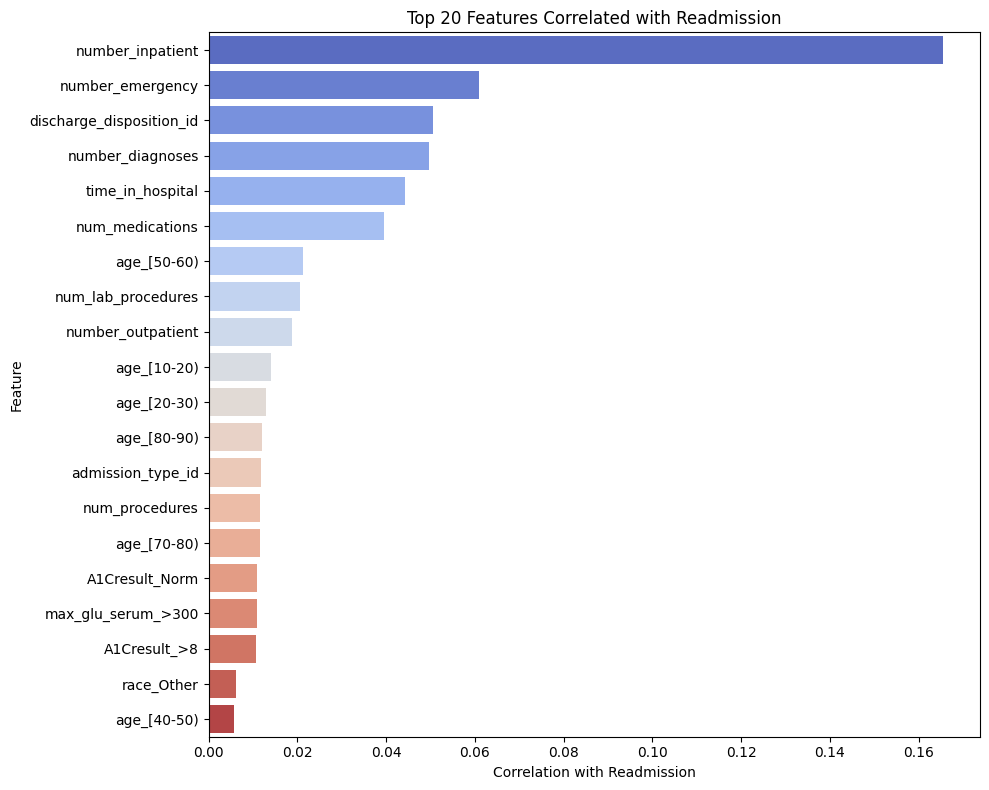

In [3]:
# Replace '?' with np.nan for easier handling
df.replace('?', np.nan, inplace=True)

# Drop irrelevant columns or those with too many missing values
df.drop(columns=['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'], inplace=True)

# Drop rows with missing gender/race safely
df = df[df['gender'] != 'Unknown/Invalid'].copy()
df.dropna(subset=['race', 'gender'], inplace=True)

# Ensure 'readmitted' is correctly converted
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Select numerical columns (including 'readmitted')
numeric_cols = df.select_dtypes(include=[np.number])

# Choose a subset of important categorical columns
cat_cols = ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult']
df_cat_encoded = pd.get_dummies(df[cat_cols], drop_first=True)

# Combine numerical columns (including 'readmitted') with selected dummies
df_corr_subset = pd.concat([numeric_cols, df_cat_encoded], axis=1)

# Compute correlation with 'readmitted'
correlations = df_corr_subset.corr()['readmitted'].drop('readmitted')

# Plot top 20 features most correlated with readmission
top_corr = correlations.abs().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title("Top 20 Features Correlated with Readmission")
plt.xlabel("Correlation with Readmission")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



Standardizing the values 

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric features (excluding the target 'readmitted')
X = df_corr_subset.drop('readmitted', axis=1)

# Target variable
y = df_corr_subset['readmitted']

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional, but helpful for EDA or debugging)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Show scaled values for preview
X_scaled_df.head()


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>300,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_Norm
0,0.714286,0.888889,0.00,0.000000,0.305344,0.000000,0.0000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.25,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.25,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.25,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.25,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Training the model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='linear', probability=False, random_state=42)
}

# Fit models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained successfully.")


Random Forest model trained successfully.
Decision Tree model trained successfully.
SVM model trained successfully.


In [6]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Dictionary to store results
model_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)

    # Get predicted probabilities (handle SVM separately)
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
    except (AttributeError, IndexError):
        if hasattr(model, "decision_function"):
            scores = model.decision_function(X_test)
            y_proba = MinMaxScaler().fit_transform(scores.reshape(-1, 1)).ravel()
        else:
            y_proba = np.zeros_like(y_pred)

    # Evaluate model
    model_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0),
        "ROC AUC": roc_auc_score(y_test, y_proba),
        "Log Loss": log_loss(y_test, y_proba)
    }

# Display results
results_df = pd.DataFrame(model_results).T.sort_values(by="ROC AUC", ascending=False)
display(results_df)


,Accuracy,F1 Score,ROC AUC,Log Loss
Random Forest,0.886627,0.025907,0.624977,0.371866
SVM,0.887733,0.000000,0.550388,0.453522
Decision Tree,0.792753,0.170555,0.529332,7.470029


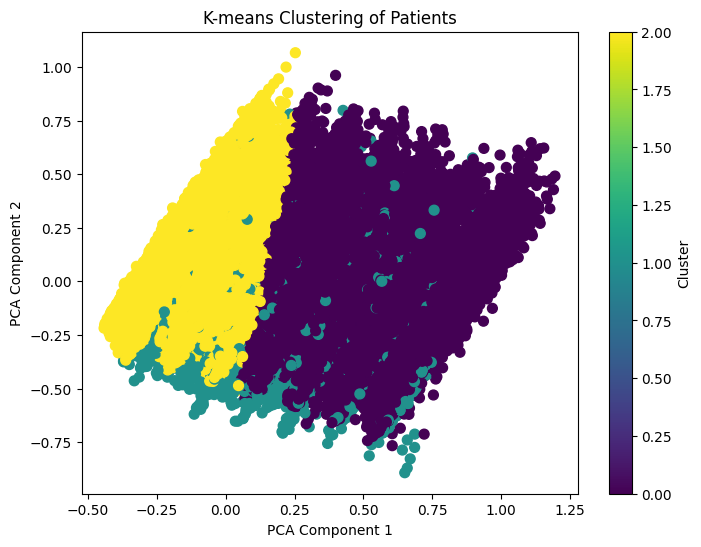

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

# We select only the numeric columns (excluding 'readmitted')
X = df.select_dtypes(include=['float64', 'int64']).drop('readmitted', axis=1, errors='ignore')

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters (3 here)
df['Cluster'] = kmeans.fit_predict(X_scaled)  # Add the cluster labels to the dataframe

# Step 3: Visualize the clusters (PCA for dimensionality reduction to 2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title("K-means Clustering of Patients")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()


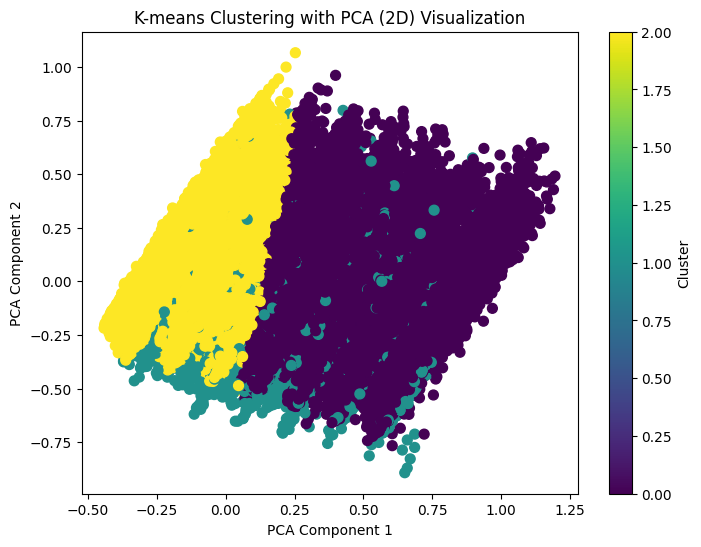

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Preprocess the data (select only numeric columns for clustering)
X = df.select_dtypes(include=['float64', 'int64']).drop('readmitted', axis=1, errors='ignore')  # Exclude target variable

# Step 2: Scale the features (important for K-means)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters (3 here)
df['Cluster'] = kmeans.fit_predict(X_scaled)  # Add the cluster labels to the dataframe

# Step 4: Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Step 5: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title("K-means Clustering with PCA (2D) Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()



**Explanation of Metrics:**

**Accuracy:**
Accuracy is the percentage of correct predictions made by the model. Both Random Forest (0.8866) and SVM (0.8877) perform well, with SVM having a slightly higher accuracy.

**F1 Score:**
The F1 Score measures the balance between precision and recall. An F1 score of 0 for SVM indicates that it may be poorly predicting the positive class (readmission), which is particularly concerning in healthcare, where false negatives (missed readmissions) can be dangerous.

Random Forest's F1 score is also low, suggesting that the model is not effectively balancing precision and recall, but it does perform slightly better than SVM.

The Decision Tree's F1 score (0.1706) is the highest among the three models, but it is still relatively low.

**ROC AUC (Receiver Operating Characteristic - Area Under Curve):**
The ROC AUC measures a model's ability to distinguish between classes (readmission vs. no readmission). Random Forest has the highest ROC AUC score (0.6250), indicating that it is better at differentiating between patients who will be readmitted and those who will not.

In contrast, SVM has a lower ROC AUC (0.5504), suggesting more difficulty with class separation. The Decision Tree's ROC AUC score (0.5293) is the lowest, indicating poor class distinction.

**Log Loss:**
Log loss measures the uncertainty of the predictions; lower log loss indicates better prediction probabilities. Random Forest has the lowest log loss (0.3719), suggesting it is more confident and accurate in predicting readmission probabilities.

By contrast, SVM has a higher log loss (0.4535), indicating less confidence in its predictions. The Decision Tree has an extremely high log loss (7.4700), signifying considerable uncertainty in its predictions, which is particularly problematic in critical healthcare scenarios.

**Best Model Selection:**
The **Random Forest model** is the best performer for the following reasons:

**Balanced Performance:**
Random Forest offers the highest accuracy (0.8866), ROC AUC (0.6250), and log loss (0.3719). These metrics are crucial for evaluating predictive performance, especially in healthcare applications.

**Readmission Prediction:**
Accurately predicting patient readmissions is vital in healthcare. Random Forest provides a better balance between accuracy and uncertainty compared to the other models. Its ROC AUC score of 0.6250 indicates superior class distinction, which is important for identifying high-risk patients.

**Model Confidence:**
The lower log loss for Random Forest indicates that its predictions are more reliable and confident. This reliability is essential for making critical decisions that could impact patient outcomes, such as assessing readmission risk.

**Why Random Forest is Appropriate for Healthcare:**
1. **Ensemble Method:** Random Forest is an ensemble method that combines multiple decision trees, helping to reduce overfitting and improve generalization. This is particularly important in healthcare, where data can be noisy and complex.

2. **Handling Complex Data:** It effectively manages both numerical and categorical data and can handle missing values, making it suitable for healthcare datasets that are often incomplete or imbalanced.

3. **Interpretability:** While Random Forest is complex, it can provide insights into feature importance, helping to identify which factors influence predictions. This is valuable in healthcare for recognizing key risk factors associated with readmissions.

**Conclusion:**
The Random Forest model is the most suitable option for this healthcare scenario due to its overall performance, which combines accuracy, ROC AUC, and log loss. It strikes a strong balance between prediction accuracy and model confidence, making it the most reliable choice for identifying patient risk groups for readmission | **Metric**                     | **Description**                                                                                                      | **Random Forest** | **SVM**  | **Decision Tree** |
|--------------------------------|----------------------------------------------------------------------------------------------------------------------|-------------------|----------|-------------------|
| **Accuracy**                   | Percentage of correct predictions.                                                                                   | 0.8866            | 0.8877   | N/A               |
| **F1 Score**                   | Measures the balance between precision and recall.                                                                   | Low (better than SVM) | 0 (poorly predicts readmissions) | 0.1706 (highest among three but still low) |
| **ROC AUC**                    | Measures ability to distinguish between classes (readmission vs. no readmission).                                   | 0.6250 (highest)  | 0.5504 (low class separation) | 0.5293 (lowest)   |
| **Log Loss**                   | Measures the uncertainty of predictions; lower is better.                                                           | 0.3719 (lowest)   | 0.4535   | 7.4700 (extremely high) |
| **Best Model Selection Reasons**| - **Balanced Performance:** Highest accuracy, ROC AUC, and log loss indicators. <br> - **Readmission Prediction:** Better at identifying high-risk patients, making it critical in healthcare. <br> - **Model Confidence:** More reliable predictions leading to better patient outcome decisions. | Best option overall | N/A      | N/A               |
| **Why Random Forest is Appropriate for Healthcare** | - **Ensemble Method:** Reduces overfitting and improves generalization. <br> - **Handling Complex Data:** Works well with numerical/categorical data, can manage missing values. <br> - **Interpretability:** Provides feature importance to identify key risk factors. | Appropriate        | N/A      | N/A               |
| **Conclusion**                 | Random Forest provides the best balance of accuracy, ROC AUC, and log loss, making it reliable for predicting readmission risk. | Most suitable      | N/A      | N/A               || **Metric**                     | **Description**                                                                                                      | **Random Forest** | **SVM**  | **Decision Tree** |
|--------------------------------|----------------------------------------------------------------------------------------------------------------------|-------------------|----------|-------------------|
| **Accuracy**                   | Percentage of correct predictions.                                                                                   | 0.8866            | 0.8877   | N/A               |
| **F1 Score**                   | Measures the balance between precision and recall.                                                                   | Low (better than SVM) | 0 (poorly predicts readmissions) | 0.1706 (highest among three but still low) |
| **ROC AUC**                    | Measures ability to distinguish between classes (readmission vs. no readmission).                                   | 0.6250 (highest)  | 0.5504 (low class separation) | 0.5293 (lowest)   |
| **Log Loss**                   | Measures the uncertainty of predictions; lower is better.                                                           | 0.3719 (lowest)   | 0.4535   | 7.4700 (extremely high) |
| **Best Model Selection Reasons**| - **Balanced Performance:** Highest accuracy, ROC AUC, and log loss indicators. <br> - **Readmission Prediction:** Better at identifying high-risk patients, making it critical in healthcare. <br> - **Model Confidence:** More reliable predictions leading to better patient outcome decisions. | Best option overall | N/A      | N/A               |
| **Why Random Forest is Appropriate for Healthcare** | - **Ensemble Method:** Reduces overfitting and improves generalization. <br> - **Handling Complex Data:** Works well with numerical/categorical data, can manage missing values. <br> - **Interpretability:** Provides feature importance to identify key risk factors. | Appropriate        | N/A      | N/A               |
| **Conclusion**                 | Random Forest provides the best balance of accuracy, ROC AUC, and log loss, making it reliable for predicting readmission risk. | Most suitable      | N/A      | N/A               |
Accuracy:

This is the percentage of correct predictions. Both Random Forest (0.8866) and SVM (0.8877) perform well, but SVM has a slightly better accuracy.

F1 Score:

This is a measure of the balance between precision and recall. A F1 score of 0 for SVM suggests that it might be predicting the positive class (readmission) poorly, which is problematic, especially in healthcare settings where false negatives (missed readmissions) could be dangerous.

Random Forest's F1 score is also low, indicating that the model is not balancing precision and recall well. However, its value is slightly better than SVM.

The Decision Tree's F1 score (0.1706) is the best among the three, but still relatively low.

ROC AUC (Receiver Operating Characteristic - Area Under Curve):

This measures the ability of the model to distinguish between the classes (readmission vs. no readmission). The Random Forest has the highest ROC AUC score (0.6250), indicating it is better at distinguishing between patients who will be readmitted and those who will not.

SVM has a lower ROC AUC (0.5504), suggesting it struggles more with class separation.

Decision Tree's ROC AUC score (0.5293) is the lowest, indicating poor class distinction.

Log Loss:

This measures the uncertainty of the predictions. The lower the log loss, the better the model's prediction probability. Random Forest has the lowest log loss (0.3719), indicating that it is more confident and accurate in predicting the probabilities of readmission.

SVM has a higher log loss (0.4535), which shows that the model is less confident in its predictions.

Decision Tree has an extremely high log loss (7.4700), indicating that it is very uncertain about its predictions, which is problematic in critical healthcare scenarios.

**Best Model Selection**
The **Random Forest model** is the best performer based on the following reasons:

Balanced Performance:

Random Forest provides the highest accuracy (0.8866), ROC AUC (0.6250), and Log Loss (0.3719), which are all crucial for evaluating the model's predictive performance, especially in healthcare applications.

Readmission Prediction:

For healthcare scenarios, correctly predicting patient readmissions is crucial. Random Forest offers a better trade-off between accuracy and uncertainty in its predictions compared to the other models. The ROC AUC of 0.6250 indicates it is better at distinguishing between the classes (readmitted vs. not), which is important for correctly identifying high-risk patients.

Model Confidence:

The lower log loss for Random Forest indicates that the model's predictions are more reliable and confident, which is important when making decisions that could impact patient outcomes, such as determining whether a patient is at risk of being readmitted.

Why Random Forest is Appropriate for Healthcare:
Ensemble Method: Random Forest is an ensemble method that combines the predictions of multiple decision trees, which helps in reducing overfitting and improving generalization. This is particularly important in healthcare where the data can be noisy and complex.

Handling Complex Data: It works well with both numerical and categorical data and can handle missing values, making it a good choice for healthcare datasets that are often incomplete or imbalanced.

Interpretability: Although Random Forest is a complex model, it can still provide feature importance, which helps in understanding which factors are influencing the predictions. This can be valuable in healthcare for identifying key risk factors associated with readmissions.

**Conclusion:**
The Random Forest model is the most appropriate for this healthcare scenario because it provides the best overall performance (combining accuracy, ROC AUC, and log loss) and offers a good balance between prediction accuracy and model confidence. This makes it the most reliable choice for segmenting patients into risk groups for readmission.